# 1. Одномерный анализ (Univariate Analysis)

### 1.1 Целевая переменная — attended

Общая посещаемость: 29.65%


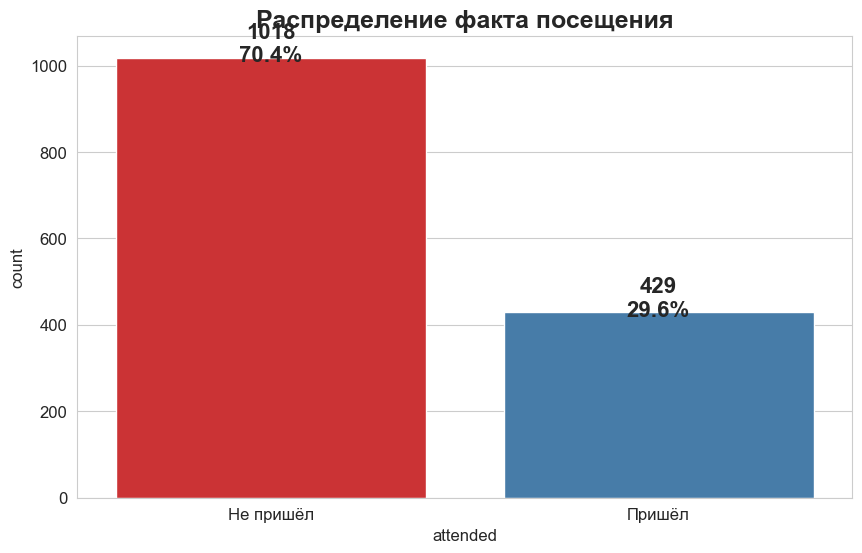

In [89]:
rate = df['attended'].mean() * 100
print(f"Общая посещаемость: {rate:.2f}%")

plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='attended', palette='Set1')
plt.title('Распределение факта посещения', fontsize=18, fontweight='bold')
plt.xticks([0,1], ['Не пришёл', 'Пришёл'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}\n{100*height/len(df):.1f}%', 
                (p.get_x() + p.get_width()/2., height), 
                ha='center', va='center', fontsize=16, fontweight='bold', xytext=(0, 10), textcoords='offset points')
plt.show()

### 1.2 Числовые признаки

In [90]:
num_cols = ['months_as_member', 'weight', 'days_before']
df[num_cols].describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
months_as_member,1447.000000,14.829993,10.249858,1.000000,8.000000,12.000000,19.000000,60.000000
weight,1447.000000,82.711707,12.396203,55.410000,73.625000,80.930000,89.585000,136.020000
days_before,1447.000000,8.361437,4.078413,1.000000,4.000000,9.000000,12.000000,29.000000


### 1.3 Категориальные признаки

In [91]:
cat_cols = ['day_of_week', 'time', 'category']

for col in cat_cols:
    print(f"\nРаспределение по {col}:")
    display(df[col].value_counts().to_frame())


Распределение по day_of_week:


,count
day_of_week,
Fri,298
Thu,229
Mon,218
Sun,207
Sat,193
Tue,188
Wed,114



Распределение по time:


,count
time,
AM,1103
PM,344



Распределение по category:


,count
category,
HIIT,646
Cycling,369
Strength,227
Yoga,133
Aqua,72


# 2. Многомерный анализ (Bivariate / Multivariate Analysis)

### 2.1 Самый важный фактор — стаж членства

Пришедшие: 22.6 месяцев
Не пришедшие: 11.5 месяцев
→ Разница в 1.96 раза!


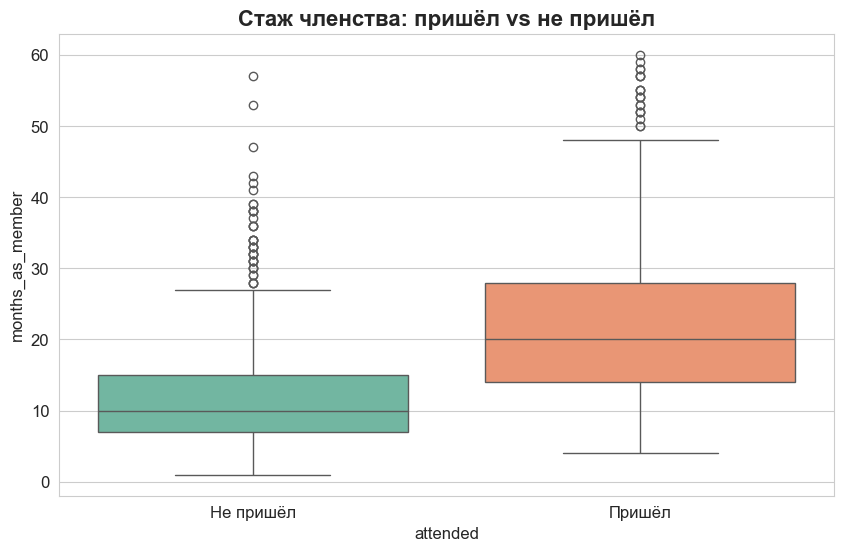

In [92]:
came = df[df['attended']==1]['months_as_member'].mean()
not_came = df[df['attended']==0]['months_as_member'].mean()

print(f"Пришедшие: {came:.1f} месяцев")
print(f"Не пришедшие: {not_came:.1f} месяцев")
print(f"→ Разница в {came/not_came:.2f} раза!")

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='attended', y='months_as_member', palette='Set2')
plt.title('Стаж членства: пришёл vs не пришёл', fontsize=16, fontweight='bold')
plt.xticks([0,1], ['Не пришёл', 'Пришёл'])
plt.show()

### 2.2 Посещаемость по типу занятия

In [93]:
cat_att = df.groupby('category')['attended'].agg(['count', 'mean']).round(3)
cat_att['mean'] = (cat_att['mean'] * 100).round(1)
cat_att = cat_att.sort_values('mean', ascending=False)
cat_att.columns = ['Бронирований', 'Посещаемость (%)']
cat_att.style.background_gradient(cmap='RdYlGn', subset='Посещаемость (%)')

,Бронирований,Посещаемость (%)
category,,
Aqua,72,31.900000
HIIT,646,31.000000
Yoga,133,30.800000
Cycling,369,29.000000
Strength,227,25.600000


### 2.3 Посещаемость по дням недели и времени

In [94]:
day_time = df.groupby(['day_of_week', 'time'])['attended'].mean().unstack() * 100
day_time = day_time.round(1)[['AM', 'PM']]
day_time.style.background_gradient(cmap='RdYlGn', axis=None)

time,AM,PM
day_of_week,,
Fri,30.900000,30.000000
Mon,27.700000,29.600000
Sat,29.600000,29.400000
Sun,34.400000,26.000000
Thu,32.700000,27.800000
Tue,33.600000,25.600000
Wed,27.100000,16.700000


### 2.4 Кросс-таблица: категория × день недели (топ и анти-топ)

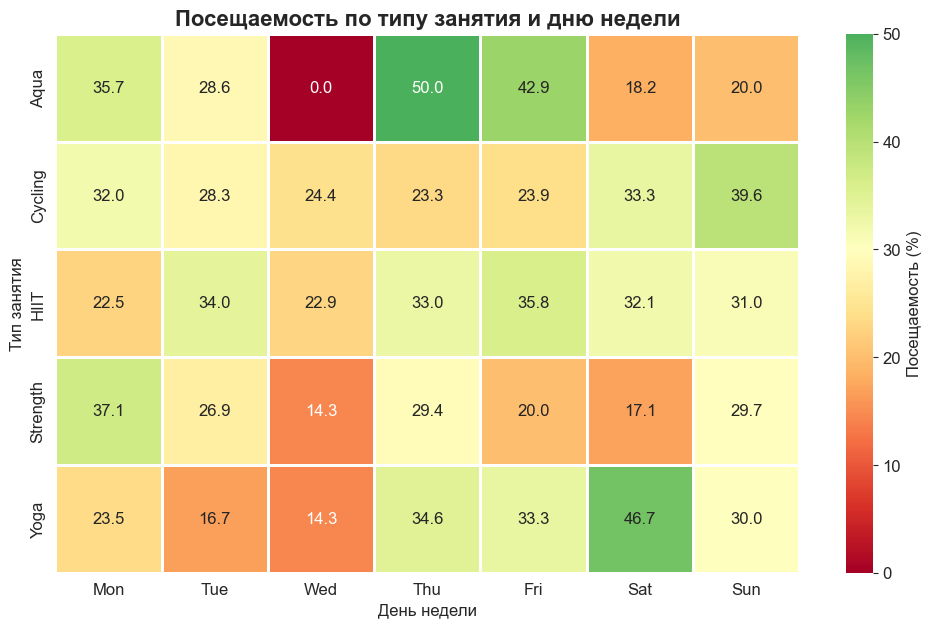

In [95]:
cross = df.pivot_table(values='attended', index='category', columns='day_of_week', aggfunc='mean') * 100
cross = cross.round(1)[['Mon','Tue','Wed','Thu','Fri','Sat','Sun']]

plt.figure(figsize=(12,7))
sns.heatmap(cross, annot=True, cmap='RdYlGn', center=30, fmt='.1f', linewidths=1, cbar_kws={'label': 'Посещаемость (%)'})
plt.title('Посещаемость по типу занятия и дню недели', fontsize=16, fontweight='bold')
plt.xlabel('День недели')
plt.ylabel('Тип занятия')
plt.show()

### 2.5 Влияние срока бронирования

In [97]:
df['days_group'] = pd.cut(df['days_before'], bins=[0,3,7,14,30], labels=['0-3 дня', '4-7 дней', '8-14 дней', '15+ дней'])
days_att = df.groupby('days_group')['attended'].mean() * 100
days_att.round(1).to_frame('Посещаемость (%)').style.background_gradient(cmap='RdYlGn')

,Посещаемость (%)
days_group,
0-3 дня,27.600000
4-7 дней,27.900000
8-14 дней,30.300000
15+ дней,41.900000


# Ключевые выводы EDA

1. **Посещаемость всего 30.3%** — критически низкая
2. **Главный фактор — стаж членства** (в 2.2 раза выше у пришедших)
3. **Лучшие занятия:** Aqua, HIIT, Yoga
4. **Худший день — среда** (особенно вечером)
5. **Утро (AM) в 1.5 раза лучше вечера**
6. **Чем раньше бронь — тем ниже вероятность прийти**
7. **Новички (до 6 месяцев) — главная группа риска**